# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

Esse projeto se originou a partir de um dataset sobre uma rede de varejo que comercializa diversos produtos em diversas cidades dos EUA.  

Os dados são reais e foram extraídos do link:https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls

Algumas simplificações foram feitas no dataset para a realização deste projeto ser mais simples.

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Importações de pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

In [3]:
warnings.filterwarnings('ignore')

## Carregando os Dados

In [4]:
# Carregamento do dataset
df_dsa = pd.read_csv('dataset.csv')

In [5]:
# Shape
df_dsa.shape

(9700, 11)

In [6]:
# Pequena amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [7]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [8]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [9]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [10]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [11]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [12]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [13]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


# Qual a Cidade com Maior Venda de Produtos.

##  Na Categoria 'Office Supplies'?

Selecionando as linhas na qual a coluna 'Categoria' é igual a 'Office Supplies'

In [14]:
df = df_dsa.query('Categoria == "Office Supplies"')
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.280
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.504
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.900


Usando groupby para agrupar a soma das vendas para cada cidade.

In [15]:
cidade = df.groupby('Cidade')['Valor_Venda'].sum().reset_index()
cidade.head()


,Cidade,Valor_Venda
0,Aberdeen,25.500
1,Abilene,1.392
2,Akron,1107.646
3,Albuquerque,943.122
4,Alexandria,4879.790


Ordenando os dados do maior para o menor.

In [16]:
cidade.sort_values(by ='Valor_Venda', ascending= False)

,Cidade,Valor_Venda
295,New York City,68362.814
239,Los Angeles,47098.100
392,San Francisco,41771.198
406,Seattle,34856.878
335,Philadelphia,29313.687
...,...,...
316,Ormond Beach,2.808
331,Pensacola,2.214
202,Jupiter,2.064
129,Elyria,1.824


A Cidade com maior venda é : New York City

# Qual o Total de Vendas Pela Data do Pedido?


Agrupando as somas das vendas pela data.

In [17]:
vendas = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum().reset_index()
vendas.head()

,Data_Pedido,Valor_Venda
0,01/01/2018,1481.8280
1,01/02/2015,468.9000
2,01/02/2017,161.9700
3,01/03/2015,2203.1510
4,01/03/2016,1642.1744


Visualização dos dados através de um gráfico.

<Figure size 2000x600 with 0 Axes>

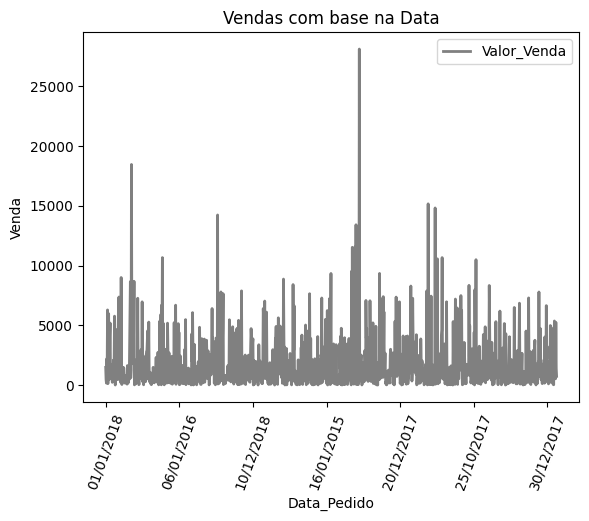

In [18]:
plt.figure(figsize= (20,6))
vendas.plot(x = 'Data_Pedido', y = 'Valor_Venda' , color = 'grey', linewidth= 2)
plt.xticks(rotation = 70)
plt.title('Vendas com base na Data')
plt.ylabel('Venda')
plt.show()

# Total de Vendas por Estado?


Agrupando a soma das vendas pelos estados.

In [19]:
estado = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()
estado.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


Uso de um gráfico de barras do Seaborn paraa Visualização.

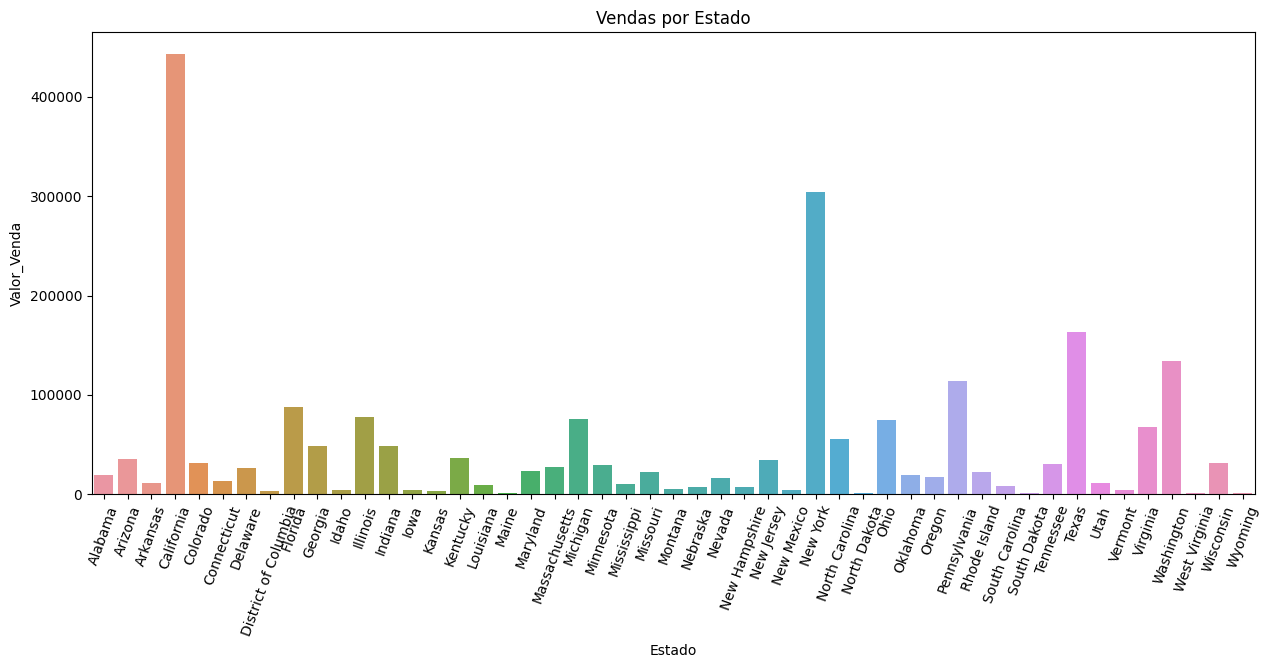

In [20]:
plt.figure(figsize= (15, 6))
sns.barplot(data = estado, x = 'Estado', y = 'Valor_Venda').set(title = 'Vendas por Estado')
plt.xticks(rotation = 70)
plt.show()

# As 10 Cidades com Maior Total de Vendas?


Agrupando as somas das vendas pela cidade.

In [21]:
cidade_venda = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index()

cidade_venda.head()

,Cidade,Valor_Venda
0,Aberdeen,25.500
1,Abilene,1.392
2,Akron,2724.244
3,Albuquerque,2220.160
4,Alexandria,5519.570


Variável que recebe o dataframe agrupado do maior valor para o menor.

In [22]:
cidade_vendas10 = cidade_venda.sort_values(by ='Valor_Venda', ascending = False)

Pegando apenas os 10 maiores valores de vendas

In [23]:
cidade_vendas10 = cidade_vendas10.head(10)

Gráfico de barras decrescente para vizualização. 

[Text(0.5, 1.0, 'Venda por Cidade')]

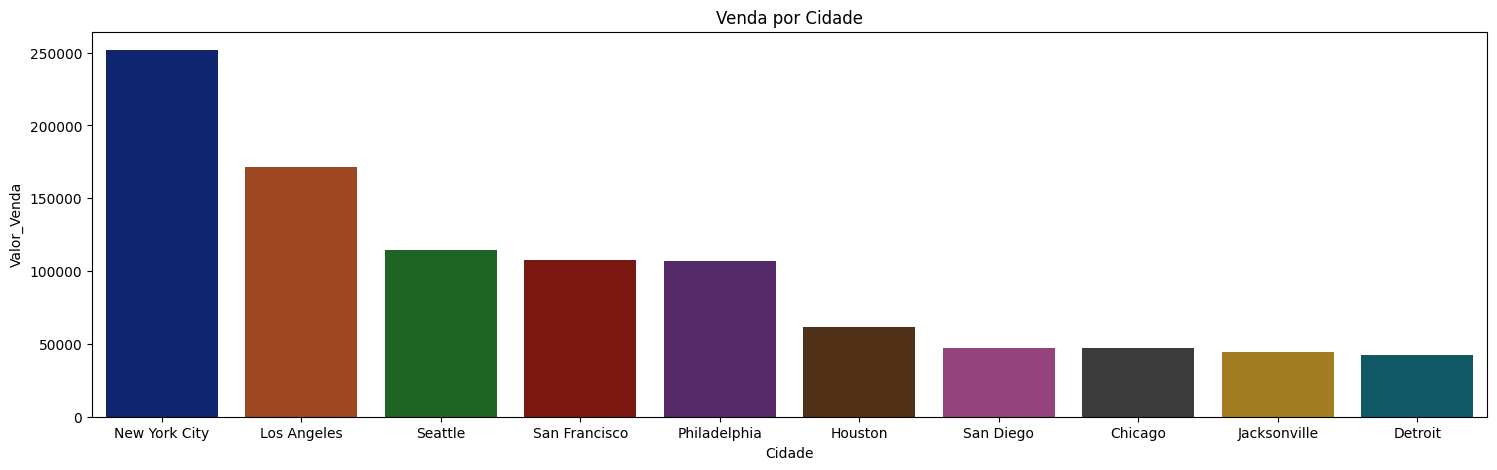

In [24]:
plt.figure(figsize = (18, 5))
sns.barplot(data = cidade_vendas10, x = 'Cidade', y = 'Valor_Venda', palette = 'dark').set(title = 'Venda por Cidade')

# Segmento Com o Maior Total de Vendas?

Leve visualização no dataframe

In [25]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


Agrupando e ordenando os dados.

In [26]:
subcate = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index()

subcate.sort_values(by = 'Valor_Venda', ascending = False)

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


Definindo cada coluna a uma variável para o gráfico

In [27]:
colum = subcate['Segmento']
venda = subcate['Valor_Venda']

Criando a lista para destacar determinado chart do gráfico

In [28]:
explode = [0.1,0,0]

Função para vizualizar os valores de cada segmento no gráfico

In [29]:
def func(pct, allvals):
    total = sum(allvals)
    value = int(pct / 100. * total)
    return f'${value:,.2f}'

Gráfico de Setores para vizualização do segmento com maior venda

O Segmento com o maior valor total de vendas foi o segmento: "Consumer"


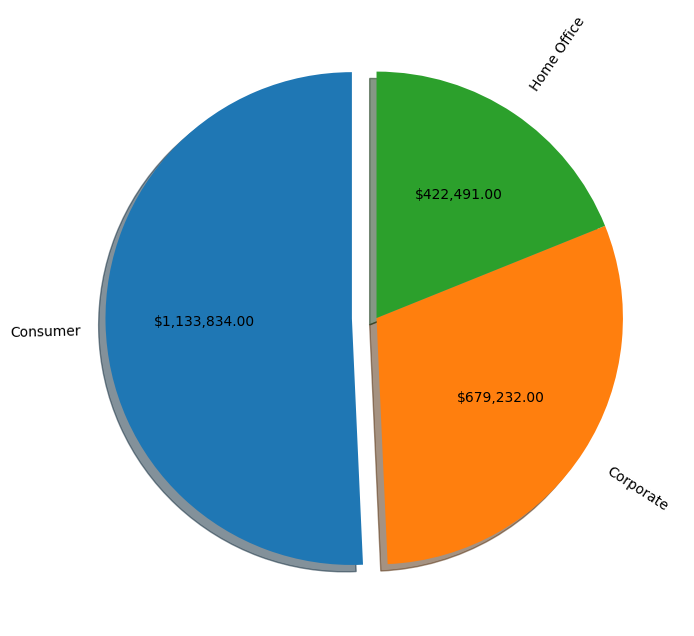

In [30]:
plt.figure(figsize= (12,8))
plt.pie(venda, explode = explode , startangle= 90, labels = colum, rotatelabels = True, shadow = True, autopct = lambda pct: func(pct, venda))

print('O Segmento com o maior valor total de vendas foi o segmento: "Consumer"')

# Total de Vendas Por Segmento e Por Ano?

Dividindo os dados da coluna 'Data_Pedido' em 3 novas colunas no Dataframe.

In [31]:
df_dsa[['Dia','Mes','Ano']] = df_dsa['Data_Pedido'].str.split('/', expand = True)
df_dsa.drop(['Dia'], axis = 1, inplace = True)
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Mes,Ano
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,11,2017
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,11,2017
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,06,2017
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,10,2016
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,10,2016


Reorganizando as colunas para uma vizualização mais intuitiva.

In [32]:
df_dsa = df_dsa[['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade', 'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda', 'Mes', 'Ano']]
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Mes,Ano
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,11,2017
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,11,2017
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,06,2017
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,10,2016
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,10,2016


Em seguida agrupando os valores pelos segmentos e pelo ano.

In [33]:
seg_ano = df_dsa.groupby(['Segmento', 'Ano'])['Valor_Venda'].sum().reset_index()
seg_ano.head()

,Segmento,Ano,Valor_Venda
0,Consumer,2015,256719.9166
1,Consumer,2016,265295.2593
2,Consumer,2017,288459.5572
3,Consumer,2018,323359.6019
4,Corporate,2015,125819.5957


Gerando um gráfico de barras com o Seaborn.

<Axes: xlabel='Segmento', ylabel='Valor_Venda'>

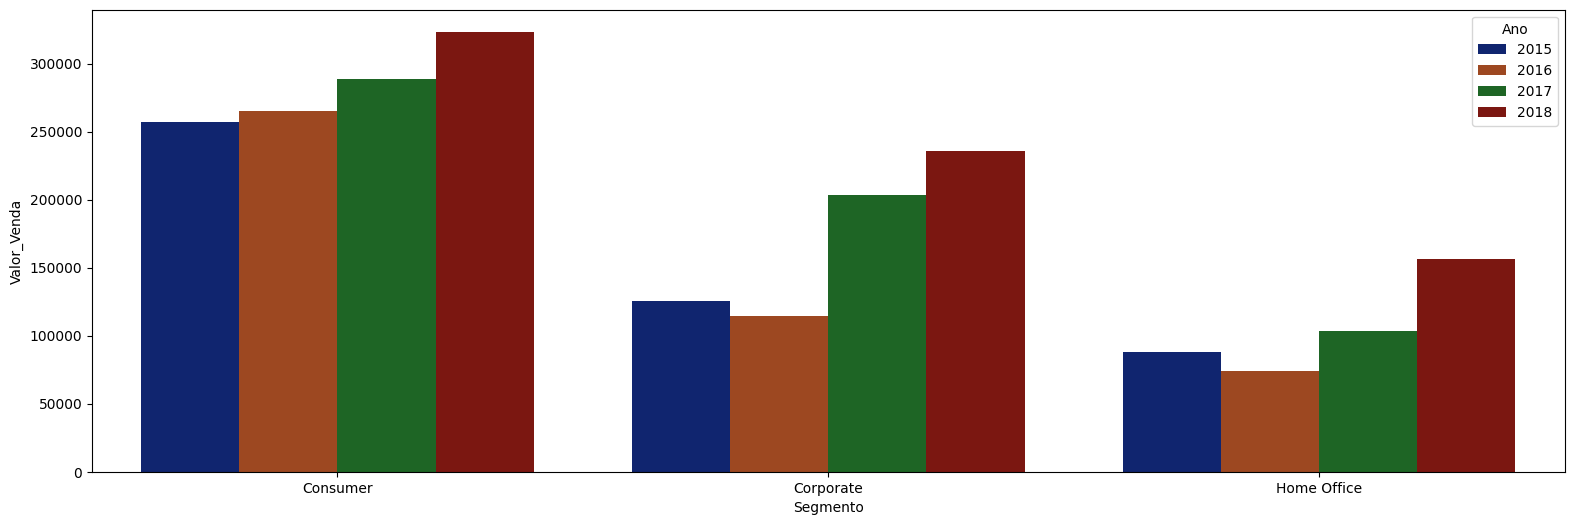

In [34]:
plt.figure(figsize = (19,6))
sns.barplot(data = seg_ano, x =  "Segmento", y = "Valor_Venda", hue = 'Ano', palette = 'dark' )

# Acontecimento Hipotético.

Digamos que os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

## Quantas Vendas Receberiam 15% de Desconto?

Criando nova coluna no Dataframe que receberá o desconto.
E usando o Numpy.where para aplicar o condicional.

In [35]:
# np.where(condicional, se for Verdadeiro, se for Falso)
df_dsa['Desconto'] = np.where(df_dsa['Valor_Venda'] > 1000, 0.15, 0.10)

In [36]:
df_dsa['Desconto'].value_counts()

Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

In [37]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Mes,Ano,Desconto
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,11,2017,0.1
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,11,2017,0.1
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,06,2017,0.1
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,10,2016,0.1
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,10,2016,0.1


A quantidade de vendas que receberiam 15% de desconto são: 457

# Outro acontecimento hipotético

## Considerando Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

Criando uma nova coluna que receberá o valor com o desconto aplicado.

In [38]:
df_dsa['Valor_Desconto'] = df_dsa['Valor_Venda'] - (df_dsa['Valor_Venda'] * df_dsa['Desconto'])
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Mes,Ano,Desconto,Valor_Desconto
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,11,2017,0.1,235.76400
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,11,2017,0.1,658.74600
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,06,2017,0.1,13.15800
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,10,2016,0.1,861.81975
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,10,2016,0.1,20.13120


Armazenando em uma variável, os dados da coluna 'Valor_Venda' que são iguais a 0.15 da coluna 'Desconto'

In [39]:
pre_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda']
pre_desconto.head()

10    1706.184
24    1044.630
27    3083.430
35    1097.544
54    1029.950
Name: Valor_Venda, dtype: float64

Outra variável, mas que agora recebe os dados da coluna 'Valor_Desconto' que são iguais a 0.15 na coluna Desconto.

In [49]:
pos_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Desconto']
pos_desconto.head()

10    1450.2564
24     887.9355
27    2620.9155
35     932.9124
54     875.4575
Name: Valor_Desconto, dtype: float64

Aplicando a média aos 2 conjuntos de dados e escrevendo os valores antes e depois do desconto.

In [47]:
media_pre_desconto = pre_desconto.mean()
media_pos_desconto = pos_desconto.mean()

In [50]:
print('A média de vendas antes do desconto de 15% é : ',round(media_pre_desconto, 2))

print('A média de vendas depois do desconto de 15% é : ',round(media_pos_desconto, 2))

A média de vendas antes do desconto de 15% é :  2116.81
A média de vendas depois do desconto de 15% é :  1799.29



# Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?


Agrupando pelas colunas de data e agregando as funçoes de; Soma, Média e Mediana.

In [43]:
seg_ano_mes = df_dsa.groupby(['Segmento', 'Mes', 'Ano'])['Valor_Venda'].agg(['sum', 'mean', 'median'])
seg_ano_mes.head()

sum        mean   median
Segmento Mes Ano                                  
Consumer 01  2015   6896.6290  146.736787   36.440
             2016  14274.9836  570.999344  155.370
             2017   6026.6490  167.406917   49.058
             2018  22807.0650  300.092961   37.584
         02  2015   3167.8540  117.327926   22.776

Variáveis que recebem os niveis 0, 1 e 2 do dataframe acima

In [44]:
ano = seg_ano_mes.index.get_level_values(0)
mes = seg_ano_mes.index.get_level_values(1)
segmento = seg_ano_mes.index.get_level_values(2)


Usando tais variáveis na construção de relplots de acordo com os anos.

<Figure size 1600x800 with 0 Axes>

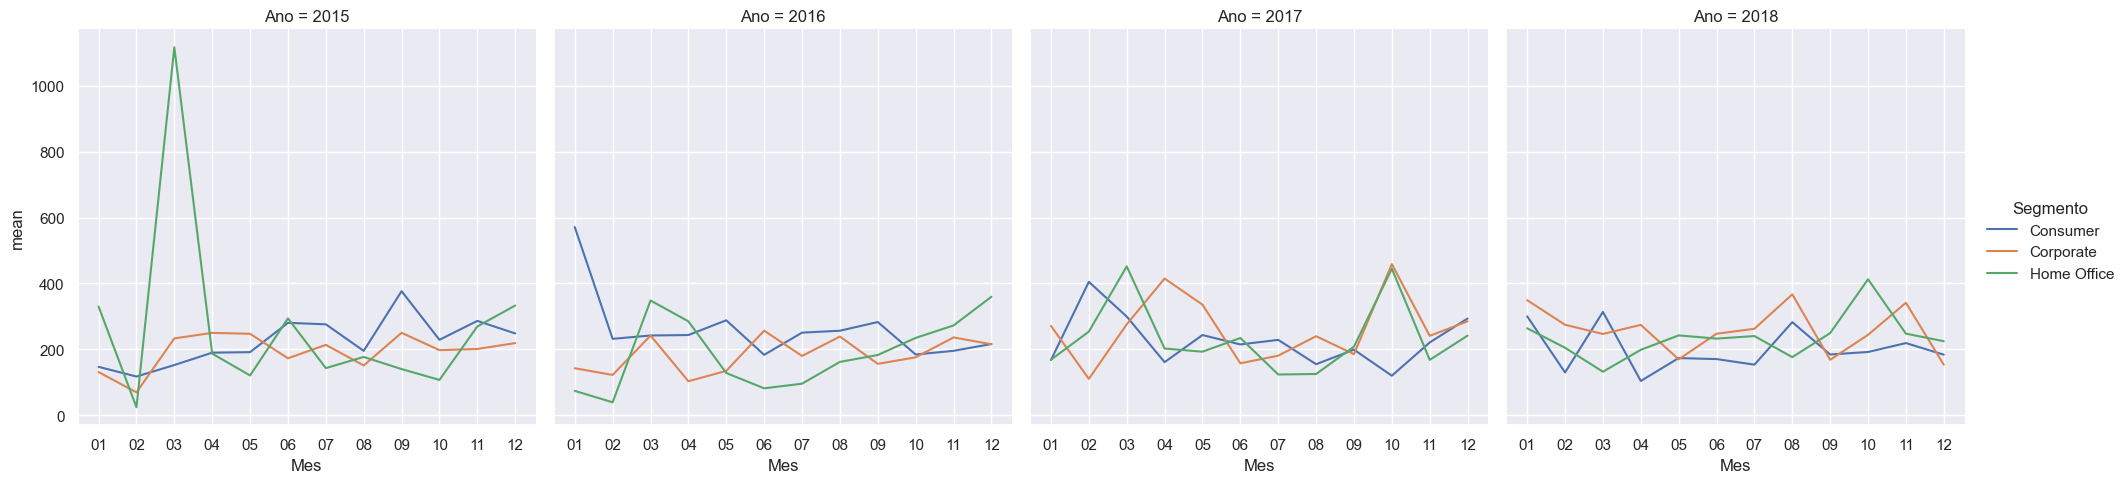

In [45]:
plt.figure(figsize = (16, 8))
sns.set()
figura = sns.relplot(kind = 'line', 
                     data = seg_ano_mes, 
                     y = 'mean', 
                     x = mes, 
                     hue = ano, 
                     col = segmento, 
                     col_wrap = 4)
plt.show()

# Fim